In [1]:
# # Downloading Packages
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install tensorflow

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
# creating the data
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

In [4]:
# Train-Test split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 1) (160, 1)
Test set: (40, 1) (40, 1)


Coefficients:  [[0.01067891]]
Intercept:  [0.08085522]
MSE: 0.006989


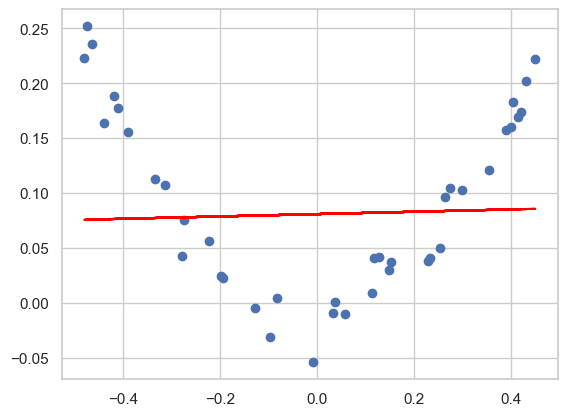

In [5]:
# Linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Fitting the model
LM = linear_model.LinearRegression()
LM.fit(X_train,y_train)

# The coefficients
print ('Coefficients: ', LM.coef_)
print ('Intercept: ', LM.intercept_)

# Predicting the values
yhat = LM.predict(X_test)

# Mean square error
print('MSE: %2f' % mean_squared_error(yhat, y_test))

# plotting the model
sns.set(style="whitegrid")
plt.scatter(X_test, y_test)
plt.plot(X_test, yhat, color='red')

Coefficients:  [[0.         0.00202521 1.03848901]]
Intercept:  [-0.00429404]
MSE: 0.000333


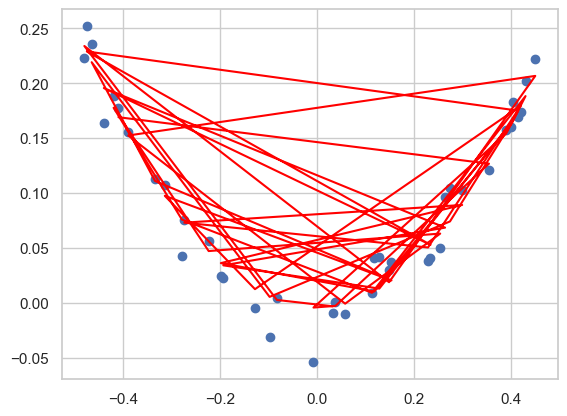

In [6]:
# Polynomial regression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

# Generating Polynomial features
PM = PolynomialFeatures(degree=2)
X_train_PM = PM.fit_transform(X_train)

# Fitting the model
LM = linear_model.LinearRegression()
train_y_ = LM.fit(X_train_PM, y_train)

# Predicting the values
y_test_PM = PM.transform(X_test)
yhat_PM = LM.predict(y_test_PM)

# Mean square error
print('MSE: %2f' % mean_squared_error(yhat_PM, y_test))

# plotting the model
sns.set(style="whitegrid")
plt.scatter(X_test, y_test)
plt.plot(X_test, yhat_PM, color='red')

In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1) 
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, verbose=1)
ypred_nn = model.predict(X_test)

print('MSE: %2f' % mean_squared_error(y_test, ypred_nn))       

Epoch 1/100
5/5 [==============================] - 2s 6ms/step - loss: 0.0093
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 13/100
5/5 [==============================] - 0s 5ms/st